<a href="https://colab.research.google.com/github/yunaisme/python-ml-study/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")

dataframe column 확인

In [ ]:
df.columns

Index(['id', 'rank', 'name', 'twt_tweets', 'twt_followers', 'valid_tweet',
       'github_total_star', 'alexa_rank', 'website_valid', 'holders_count',
       'copy_max', 'verify_source', 'developer_holding_rate',
       'top_holders_rate'],
      dtype='object')

In [ ]:
data = df.drop(columns=["id", "rank", "name"])

In [ ]:
data = data.astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   twt_tweets              1551 non-null   float64
 1   twt_followers           1551 non-null   float64
 2   valid_tweet             1551 non-null   float64
 3   github_total_star       1551 non-null   float64
 4   alexa_rank              1551 non-null   float64
 5   website_valid           1551 non-null   float64
 6   holders_count           1551 non-null   float64
 7   copy_max                1551 non-null   float64
 8   verify_source           1551 non-null   float64
 9   developer_holding_rate  1551 non-null   float64
 10  top_holders_rate        1551 non-null   float64
dtypes: float64(11)
memory usage: 133.4 KB


In [ ]:
data.isnull().sum()

twt_tweets                0
twt_followers             0
valid_tweet               0
github_total_star         0
alexa_rank                0
website_valid             0
holders_count             0
copy_max                  0
verify_source             0
developer_holding_rate    0
top_holders_rate          0
dtype: int64

In [ ]:
data = data.dropna(axis=0)

Sklearn을 이용한 PCA 분석과 차원 감소
https://bcho.tistory.com/1209?category=555440

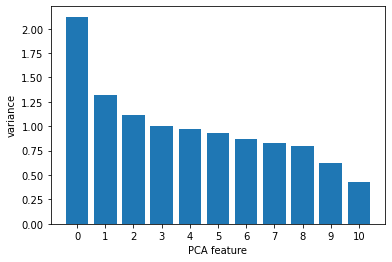

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

DBSCAN https://bcho.tistory.com/1205?category=555440

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

ss = MinMaxScaler()
data_s = pd.DataFrame(ss.fit_transform(data), columns = data.columns)

# create model and prediction
model_DBSCAN = DBSCAN(eps=0.3, min_samples=7)
predict_DBSCAN = pd.DataFrame(model_DBSCAN.fit_predict(data_s))
predict_DBSCAN.columns=['predict']

# concatenate labels to df as a new column
r_DBSCAN = pd.concat([data_s,predict_DBSCAN],axis=1)

In [ ]:
r_DBSCAN.head()

,twt_tweets,twt_followers,valid_tweet,github_total_star,alexa_rank,website_valid,holders_count,copy_max,verify_source,developer_holding_rate,top_holders_rate,predict
0,0.017745,0.036620,1.0,0.012174,0.037511,1.0,0.021753,1.0,1.0,0.0,0.866492,0
1,0.049617,0.323944,1.0,0.412390,0.005471,1.0,0.162970,0.0,1.0,0.0,0.495024,2
2,0.002851,0.000580,1.0,0.032979,0.266006,1.0,0.006514,1.0,1.0,0.0,0.138233,0
3,0.029085,0.014085,1.0,0.115888,0.255696,1.0,0.012400,1.0,1.0,0.0,0.596863,0
4,0.009723,0.002623,1.0,0.003082,1.000000,1.0,0.000482,1.0,1.0,0.0,0.030461,-1


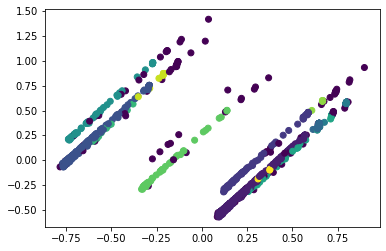

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data_s)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=r_DBSCAN['predict']);
plt.show();

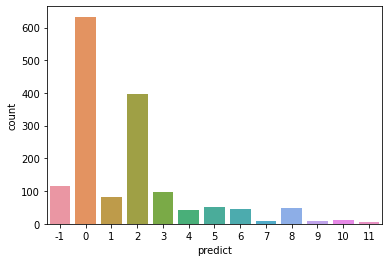

In [ ]:
sns.countplot(x="predict", data=predict_DBSCAN)
plt.title("")
plt.show()

In [ ]:
r_DBSCAN.to_csv('/content/drive/MyDrive/dataset/output_DBSCAN.csv')

KMEANS https://bcho.tistory.com/1203?category=555440

cluster 수

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

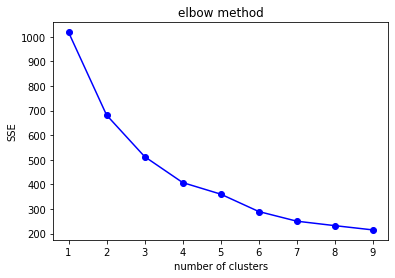

In [ ]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_s, 10)

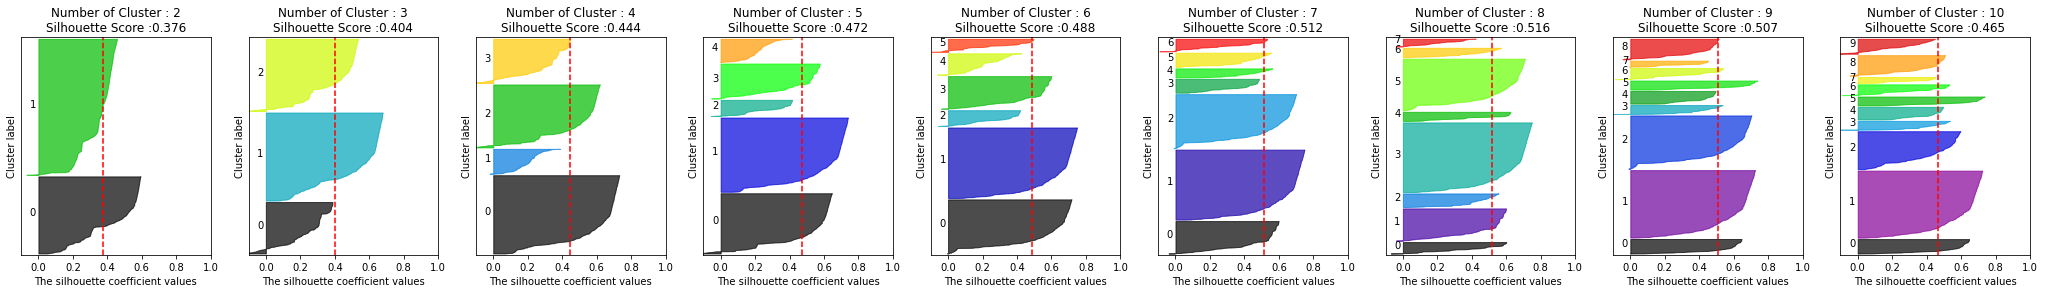

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([ 2,3,4,5,6,7,8,9,10], data_s)

클러스터 2개

In [ ]:
# create model and prediction
model_KMEANS_2 = KMeans(n_clusters=2,algorithm='auto')
model_KMEANS_2.fit(data_s)
predict_KMEANS_2 = pd.DataFrame(model_KMEANS_2.predict(data_s))
predict_KMEANS_2.columns=['predict']

# concatenate labels to df as a new column
r_KMEANS_2 = pd.concat([data_s,predict_KMEANS_2],axis=1)

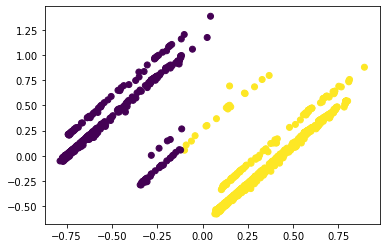

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data_s)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=r_KMEANS_2['predict']);
plt.show();

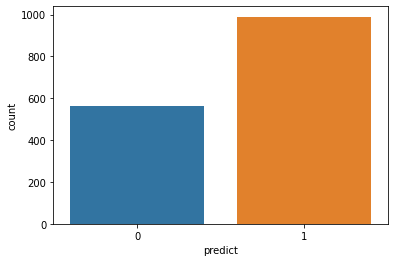

In [ ]:
sns.countplot(x="predict", data=predict_KMEANS_2)
plt.title("")
plt.show()

In [ ]:
predict_KMEANS_2.to_csv('/content/drive/MyDrive/dataset/output_KMEANS_2.csv')

클러스터 8개

In [ ]:
# create model and prediction
model_KMEANS_8 = KMeans(n_clusters=8,algorithm='auto')
model_KMEANS_8.fit(data_s)
predict_KMEANS_8 = pd.DataFrame(model_KMEANS_8.predict(data_s))
predict_KMEANS_8.columns=['predict']

# concatenate labels to df as a new column
r_KMEANS_8 = pd.concat([data_s,predict_KMEANS_8],axis=1)

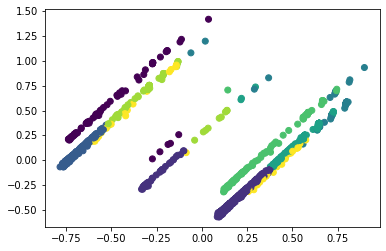

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=8)
pca_features = model.fit_transform(data_s)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=r_KMEANS_8['predict']);
plt.show();

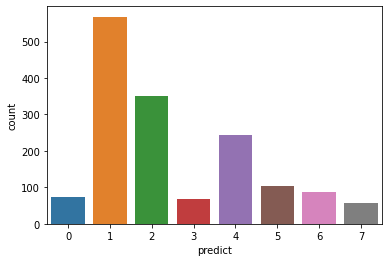

In [ ]:
sns.countplot(x="predict", data=predict_KMEANS_8)
plt.title("")
plt.show()

In [ ]:
r_KMEANS_8.to_csv('/content/drive/MyDrive/dataset/output_KMEANS_8.csv')

In [ ]:
centers = pd.DataFrame(model_KMEANS_8.cluster_centers_, columns=['twt_tweets', 'twt_followers', 'valid_tweet',
       'github_total_star', 'alexa_rank', 'website_valid', 'holders_count',
       'copy_max', 'verify_source', 'developer_holding_rate',
       'top_holders_rate'])

In [ ]:
centers.head(10)

,twt_tweets,twt_followers,valid_tweet,github_total_star,alexa_rank,website_valid,holders_count,copy_max,verify_source,developer_holding_rate,top_holders_rate
0,1.397727e-02,2.245474e-02,9.315068e-01,0.002499,0.420612,0.924658,0.003037,3.424658e-02,0.972603,1.000000e+00,0.882352
1,2.232143e-02,3.560990e-02,1.000000e+00,0.017483,0.131514,0.989437,0.007596,9.630282e-01,0.991197,1.387779e-15,0.785717
2,2.707082e-02,5.090028e-02,1.000000e+00,0.028889,0.096620,0.994286,0.015094,5.218048e-15,0.997143,3.885781e-16,0.793553
3,-1.040834e-17,-6.938894e-18,5.551115e-16,0.001831,0.975875,0.615942,0.006908,9.565217e-01,0.985507,1.159420e-01,0.846180
4,1.243216e-02,9.035338e-03,1.000000e+00,0.008960,0.937560,0.760246,0.007999,9.938525e-01,0.979508,-3.608225e-16,0.818408
5,1.090890e-02,1.269331e-02,9.805825e-01,0.002705,0.475823,0.907767,0.003823,9.951456e-01,0.980583,1.000000e+00,0.872502
6,1.553216e-02,6.294317e-03,1.000000e+00,0.002661,0.890988,0.860465,0.003414,5.813953e-02,1.000000,-1.387779e-17,0.818257
7,-1.040834e-17,-6.938894e-18,3.330669e-16,0.010036,0.340138,0.982759,0.008596,6.465517e-01,1.000000,1.110223e-16,0.746515
